 ## Here are the tests for the different detectors

In [9]:
%matplotlib inline

# Import necessary dependencies
import cv2
import numpy as np
import unittest
import sys
import os
import matplotlib.pyplot as plt

from ikomia.dataprocess.workflow import Workflow

# Import the necessary classes
from detectors import RedCapDetector 
from detectors import YOLODetector

from segmentors import YoloSegmentor

from removers import BlurringRemover

# interactive notebook widgets
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [2]:
def imshow(image, cmap=None):
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.imshow(image_rgb, cmap)
  plt.axis('off')  # Hide axis for better visualization
  plt.show()

In [11]:

YoloDetector = YOLODetector(device='cuda')
segmentor = YoloSegmentor(device='cuda')

WARNING ⚠️ Python>=3.10 is required, but Python==3.9.18 is currently installed 


In [4]:
test_image = cv2.imread('_test_data/test1.jpg')
imshow(test_image)

In [5]:
"""
Test if the red cap detector correctly identifies a bounding box for a red cap.
"""
red_cap_detector = RedCapDetector()

red_cap_boxes = red_cap_detector.detect(test_image)
print("Red Cap Detector Output:", red_cap_boxes)
# Draw the bounding box on the image knowing that the red_cap_detector returns a bounding box in the form (x, y, w, h) where the red cap is located. If no cap is found, returns None.

if red_cap_boxes is not None:
    test_image_bis = test_image.copy()
    for box in red_cap_boxes:
        x, y, w, h = box
        cv2.rectangle(test_image_bis, (x, y), (x+w, y+h), (0, 255, 0), 2)
        # cv2.putText(test_image_bis, 'Red Cap', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    
    imshow(test_image_bis)

Red Cap Detector Output: [(424, 451, 83, 49)]


In [6]:
boxes = YoloDetector.human_detect(test_image)

print("YOLO Detector Output:", boxes)

Will run on cuda


/users/eleves-b/2022/mathias.perez/Ikomia/Plugins/Python/infer_yolo_v7/yolov7/utils/torch_utils.py:276: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(weigh

Fusing layers... 


/users/eleves-b/2022/mathias.perez/Desktop/INF573-MakeBenardDisappear/ikomia_env/lib64/python3.9/site-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Workflow Untitled run successfully in 884.944907 ms.
YOLO Detector Output: [(498, 759, 161, 264), (672, 729, 156, 294), (0, 797, 126, 226), (416, 451, 119, 474), (611, 506, 111, 452), (222, 796, 162, 227), (841, 813, 179, 210), (773, 513, 151, 486), (295, 422, 84, 372), (93, 456, 102, 460), (185, 594, 129, 420), (491, 344, 92, 368), (696, 394, 88, 372), (862, 437, 104, 347)]


Will run on cuda
Fusing layers... 
Workflow Untitled run successfully in 290.507577 ms.

0: 640x640 1 person, 21.4ms
Speed: 2.2ms preprocess, 21.4ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)
Workflow Untitled run successfully in 435.532631 ms.


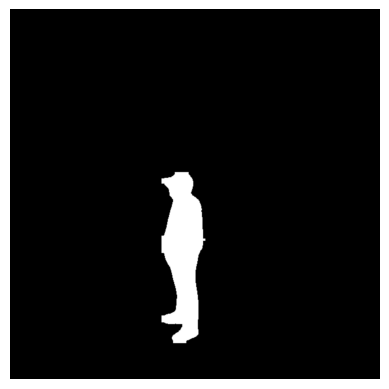

CPU times: user 1.26 s, sys: 181 ms, total: 1.44 s
Wall time: 809 ms


In [12]:
%%time
"""
Test if the human detector correctly identifies a bounding box for a person.
"""

human_boxes = YoloDetector.detect(test_image)
mask = segmentor.segment(test_image, human_boxes)

imshow(mask, cmap='gray')

# # Draw the bounding box on the image knowing that the red_cap_detector returns a bounding box in the form (x, y, w, h) where the red cap is located. If no cap is found, returns None.

# if human_boxes is not None:
#     test_image_bis = test_image.copy()
#     for box in human_boxes:
#         x, y, w, h = box
#         cv2.rectangle(test_image_bis, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
#     imshow(test_image_bis)


In [15]:
test_image1 = cv2.imread('_test_data/test1.jpg') 
test_image2 = cv2.imread('_test_data/test2.jpg')
test_image3 = cv2.imread('_test_data/test3.jpg')
test_image4 = cv2.imread('_test_data/test4.jpg')

images = [test_image1, test_image2, test_image3, test_image4]

Workflow Untitled run successfully in 42.375906 ms.

0: 640x640 1 person, 20.9ms
Speed: 1.5ms preprocess, 20.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Workflow Untitled run successfully in 307.336315 ms.


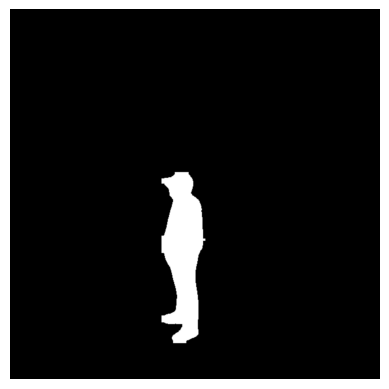

Workflow Untitled run successfully in 31.648314 ms.

0: 640x640 2 persons, 1 cup, 20.1ms
Speed: 0.8ms preprocess, 20.1ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)
Workflow Untitled run successfully in 384.209633 ms.


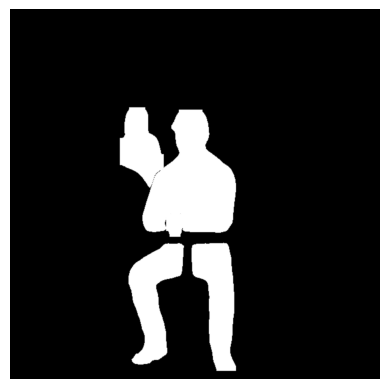

Workflow Untitled run successfully in 31.77852 ms.

0: 640x640 3 persons, 1 chair, 20.1ms
Speed: 0.8ms preprocess, 20.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Workflow Untitled run successfully in 303.764108 ms.


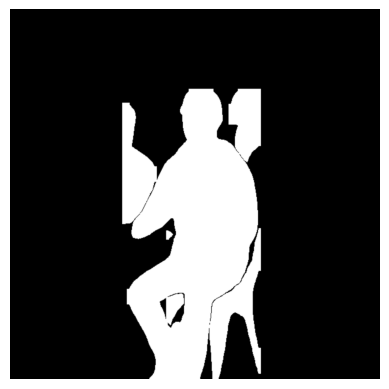

Workflow Untitled run successfully in 32.110669 ms.

0: 640x640 1 person, 20.1ms
Speed: 0.8ms preprocess, 20.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Workflow Untitled run successfully in 299.06089 ms.


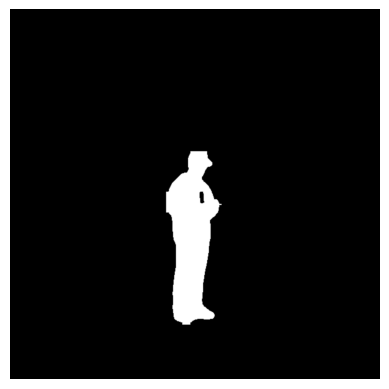

In [16]:
for image in images:
    boxes = YoloDetector.detect(image)
    mask = segmentor.segment(image, boxes)
    imshow(mask, cmap='gray')

In [ ]:
segmentor = YoloSegmentor(device='cuda')

WARNING ⚠️ Python>=3.10 is required, but Python==3.9.18 is currently installed 



0: 640x640 1 person, 21.2ms
Speed: 0.8ms preprocess, 21.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Workflow Untitled run successfully in 309.153514 ms.


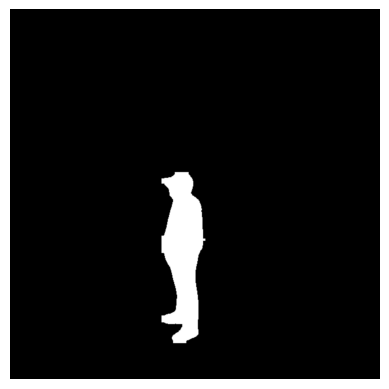

In [ ]:
mask = segmentor.segment(test_image, human_boxes)

imshow(mask, cmap='gray')

In [ ]:
remover = BlurringRemover(blur_kernel_size=(71, 71))

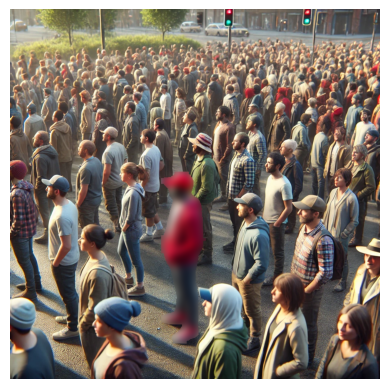

In [ ]:
blurred_image = remover.remove(test_image, mask)

imshow(blurred_image)

In [ ]:
# Add the Canny Edge Detector
segmentor = wf.add_task(name="infer_yolo_v8_seg", auto_connect=True)

# Run on your image
test_image_bounded = test_image.copy()
for box in intersections:
    x, y, w, h = box
    # Fill everything outside the bounding box with black
    test_image_bounded[:y, :] = 0
    test_image_bounded[y+h:, :] = 0
    test_image_bounded[:, :x] = 0
    test_image_bounded[:, x+w:] = 0

imshow(test_image_bounded)

wf.run_on(test_image_bounded)

imshow(segmentor.get_image_with_mask_and_graphics())

NameError: name 'wf' is not defined

In [ ]:
results = segmentor.get_results()
print(test_image_bounded.shape)

for obj in results.get_objects():
    print(obj.mask)
    print(obj.mask.shape)



(1024, 1024, 3)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(1024, 1024)


In [ ]:
# Let's test the find intersecting human function for all test cases
test_image1 = cv2.imread('_test_data/test1.jpg') 
test_image2 = cv2.imread('_test_data/test2.jpg')
test_image3 = cv2.imread('_test_data/test3.jpg')
test_image4 = cv2.imread('_test_data/test4.jpg')

human_detector = YOLODetector(device='cuda')

red_cap_boxes_1 = red_cap_detector.detect(test_image1,hue_range=(0, 5), alt_hue_range=(170, 180))
red_cap_boxes_2 = red_cap_detector.detect(test_image2,hue_range=(0, 5), alt_hue_range=(170, 180))
red_cap_boxes_3 = red_cap_detector.detect(test_image3, hue_range=(0, 5), alt_hue_range=(170, 180))
red_cap_boxes_4 = red_cap_detector.detect(test_image4,hue_range=(0, 5), alt_hue_range=(170, 180))

human_boxes_1 = human_detector.detect(test_image1)
human_boxes_2 = human_detector.detect(test_image2)
human_boxes_3 = human_detector.detect(test_image3)
human_boxes_4 = human_detector.detect(test_image4)

intersections_1 = find_intersecting_human(red_cap_boxes_1, human_boxes_1)
intersections_2 = find_intersecting_human(red_cap_boxes_2, human_boxes_2)
intersections_3 = find_intersecting_human(red_cap_boxes_3, human_boxes_3)
intersections_4 = find_intersecting_human(red_cap_boxes_4, human_boxes_4)

if intersections_1 is not None:
    test_image_bis1 = test_image1.copy()
    for box in intersections_1:
        x, y, w, h = box
        cv2.rectangle(test_image_bis1, (x, y), (x+w, y+h), (0, 255, 0), 2)

if intersections_2 is not None:
    test_image_bis2 = test_image2.copy()
    for box in intersections_2:
        x, y, w, h = box
        cv2.rectangle(test_image_bis2, (x, y), (x+w, y+h), (0, 255, 0), 2)

if intersections_3 is not None:
    test_image_bis3 = test_image3.copy()
    for box in intersections_3:
        x, y, w, h = box
        cv2.rectangle(test_image_bis3, (x, y), (x+w, y+h), (0, 255, 0), 2)

if intersections_4 is not None:
    test_image_bis4 = test_image4.copy()
    for box in intersections_4:
        x, y, w, h = box
        cv2.rectangle(test_image_bis4, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    
    # Display the images in a single plot
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].imshow(cv2.cvtColor(test_image_bis1, cv2.COLOR_BGR2RGB))
axs[0, 0].axis('off')
axs[0, 0].set_title('Test Image 1')

axs[0, 1].imshow(cv2.cvtColor(test_image_bis2, cv2.COLOR_BGR2RGB))
axs[0, 1].axis('off')
axs[0, 1].set_title('Test Image 2')

axs[1, 0].imshow(cv2.cvtColor(test_image_bis3, cv2.COLOR_BGR2RGB))
axs[1, 0].axis('off')
axs[1, 0].set_title('Test Image 3')

axs[1, 1].imshow(cv2.cvtColor(test_image_bis4, cv2.COLOR_BGR2RGB))
axs[1, 1].axis('off')
axs[1, 1].set_title('Test Image 4')

plt.show()




Will run on cuda
Fusing layers... 
Workflow Untitled run successfully in 280.321139 ms.
Workflow Untitled run successfully in 31.879235 ms.
Workflow Untitled run successfully in 31.935089 ms.
Workflow Untitled run successfully in 31.494047 ms.



## Let's have more testing for the red cap detector by playing with the multiple parameters it has

In [ ]:
test_image1 = cv2.imread('_test_data/test1.jpg') 
test_image2 = cv2.imread('_test_data/test2.jpg')
test_image3 = cv2.imread('_test_data/test3.jpg')
test_image4 = cv2.imread('_test_data/test4.jpg')

In [ ]:
@interact(min_size = (0, 1000, 10), min_circularity = (0, 1, 0.1))
def imshow_with_red_cap(min_size, min_circularity):
    red_cap_boxes_1 = red_cap_detector.detect(test_image1,hue_range=(0, 5), alt_hue_range=(170, 180), min_size=min_size, min_circularity=min_circularity)
    red_cap_boxes_2 = red_cap_detector.detect(test_image2,hue_range=(0, 5), alt_hue_range=(170, 180), min_size=min_size, min_circularity=min_circularity)
    red_cap_boxes_3 = red_cap_detector.detect(test_image3, hue_range=(0, 5), alt_hue_range=(170, 180),min_size=min_size, min_circularity=min_circularity)
    red_cap_boxes_4 = red_cap_detector.detect(test_image4,hue_range=(0, 5), alt_hue_range=(170, 180), min_size=min_size, min_circularity=min_circularity)

    if red_cap_boxes_1 is not None:
        test_image_bis1 = test_image1.copy()
        for box in red_cap_boxes_1:
            x, y, w, h = box
            cv2.rectangle(test_image_bis1, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    if red_cap_boxes_2 is not None:
        test_image_bis2 = test_image2.copy()
        for box in red_cap_boxes_2:
            x, y, w, h = box
            cv2.rectangle(test_image_bis2, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    if red_cap_boxes_3 is not None:
        test_image_bis3 = test_image3.copy()
        for box in red_cap_boxes_3:
            x, y, w, h = box
            cv2.rectangle(test_image_bis3, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    if red_cap_boxes_4 is not None:
        test_image_bis4 = test_image4.copy()
        for box in red_cap_boxes_4:
            x, y, w, h = box
            cv2.rectangle(test_image_bis4, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    
    # Display the images in a single plot
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    axs[0, 0].imshow(cv2.cvtColor(test_image_bis1, cv2.COLOR_BGR2RGB))
    axs[0, 0].axis('off')
    axs[0, 0].set_title('Test Image 1')

    axs[0, 1].imshow(cv2.cvtColor(test_image_bis2, cv2.COLOR_BGR2RGB))
    axs[0, 1].axis('off')
    axs[0, 1].set_title('Test Image 2')

    axs[1, 0].imshow(cv2.cvtColor(test_image_bis3, cv2.COLOR_BGR2RGB))
    axs[1, 0].axis('off')
    axs[1, 0].set_title('Test Image 3')

    axs[1, 1].imshow(cv2.cvtColor(test_image_bis4, cv2.COLOR_BGR2RGB))
    axs[1, 1].axis('off')
    axs[1, 1].set_title('Test Image 4')

    plt.show()

# Results :
# Circularity needs to be at max 0.3
# Min size at 620 detects the caps only

interactive(children=(IntSlider(value=500, description='min_size', max=1000, step=10), FloatSlider(value=0.0, …

## Lets do the same thing for the human detector now

In [ ]:
@interact(conf = (0, 1, 0.1), iou = (0, 1, 0.1))
def imshow_with_yolo(conf, iou):
    human_boxes_1 = human_detector.detect(test_image1, conf, iou)
    human_boxes_2 = human_detector.detect(test_image2, conf, iou)
    human_boxes_3 = human_detector.detect(test_image3, conf, iou)
    human_boxes_4 = human_detector.detect(test_image4, conf, iou)


    if human_boxes_1 is not None:
        test_image_bis1 = test_image1.copy()
        for box in human_boxes_1:
            x, y, w, h = box
            cv2.rectangle(test_image_bis1, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    if human_boxes_2 is not None:
        test_image_bis2 = test_image2.copy()
        for box in human_boxes_2:
            x, y, w, h = box
            cv2.rectangle(test_image_bis2, (x, y), (x+w, y+h), (0, 255, 0), 2)

    if human_boxes_3 is not None:
        test_image_bis3 = test_image3.copy()
        for box in human_boxes_3:
            x, y, w, h = box
            cv2.rectangle(test_image_bis3, (x, y), (x+w, y+h), (0, 255, 0), 2)

    if human_boxes_4 is not None:
        test_image_bis4 = test_image4.copy()
        for box in human_boxes_4:
            x, y, w, h = box
            cv2.rectangle(test_image_bis4, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    
    # Display the images in a single plot
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    axs[0, 0].imshow(cv2.cvtColor(test_image_bis1, cv2.COLOR_BGR2RGB))
    axs[0, 0].axis('off')
    axs[0, 0].set_title('Test Image 1')

    axs[0, 1].imshow(cv2.cvtColor(test_image_bis2, cv2.COLOR_BGR2RGB))
    axs[0, 1].axis('off')
    axs[0, 1].set_title('Test Image 2')

    axs[1, 0].imshow(cv2.cvtColor(test_image_bis3, cv2.COLOR_BGR2RGB))
    axs[1, 0].axis('off')
    axs[1, 0].set_title('Test Image 3')

    axs[1, 1].imshow(cv2.cvtColor(test_image_bis4, cv2.COLOR_BGR2RGB))
    axs[1, 1].axis('off')
    axs[1, 1].set_title('Test Image 4')

    plt.show()

# Results :
# Conf needs to be at 0.5
# IOU needs to be at 0.5

interactive(children=(FloatSlider(value=0.0, description='conf', max=1.0), FloatSlider(value=0.0, description=…